## Random Sample Imputation 
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

it is similar to mean/median imputaion but here well impute with random number 

In [50]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [52]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
df.shape

(891, 3)

In [54]:
#to get the sum of null values present 
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [55]:
#to get percentage of null values present 
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [56]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [57]:
df['Age'].dropna().sample()

588    22.0
Name: Age, dtype: float64

In [58]:
tt = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
tt

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [59]:
type(tt)

pandas.core.series.Series

In [60]:
tt.index = df[df['Age'].isnull()].index

In [61]:
tt

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [62]:
df['Age'].dropna().sample(20,random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
Name: Age, dtype: float64

In [63]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [64]:
df.loc[df['Age'].isnull(),'Fare']

5       8.4583
17     13.0000
19      7.2250
26      7.2250
28      7.8792
        ...   
859     7.2292
863    69.5500
868     9.5000
878     7.8958
888    23.4500
Name: Fare, Length: 177, dtype: float64

In [65]:
def impute_nan_rand(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    # creating a random variable for the imputation for better understanding refer above
    random_variable = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # matching the indexes of missing values to index of the random variable created 
    random_variable.index = df[df[variable].isnull()].index
    #changing the NAN values to the random_variable
    df.loc[df[variable].isnull(),variable+'_random'] = random_variable

In [66]:
med = df['Age'].median()

In [67]:
impute_nan_rand(df,'Age',med)

In [68]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [69]:
#df.drop(columns='Age-random').head()

KeyError: "['Age-random'] not found in axis"

In [70]:
df['Age_random'].isnull().sum()

0

In [92]:
print(df['Age'].std())
print(df['Age_median'].std())
print(df['Age_random'].std())

13.019696550973194
13.019696550973194
14.5636540895687


##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

##### Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [72]:
df1 = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [73]:
df1

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [74]:
df1['Age_miss'] = np.where(df1['Age'].isnull(),1,0)

In [75]:
df1

,Survived,Age,Fare,Age_miss
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [76]:
df1['Age'].fillna(df.Age.median(),inplace=True)

In [77]:
df1

,Survived,Age,Fare,Age_miss
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


In [78]:
df1['Age'].isnull().sum()

0

In [79]:
df1['Age'].std()

13.019696550973194

#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

## END of distribution imputation

used for missing completely at random

in this process the end of the distribution value is raplaced with NAN values

In [122]:
df2 = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [123]:
df2

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [124]:
df2.Age.isnull().sum()

177

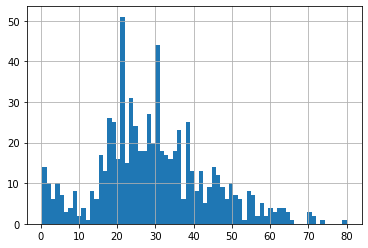

In [125]:
df2.Age.hist(bins=70)

In [126]:
extreme = df2.Age.mean()+3*df2.Age.std()

In [127]:
extreme

73.27860964406095

In [128]:
import seaborn as sns

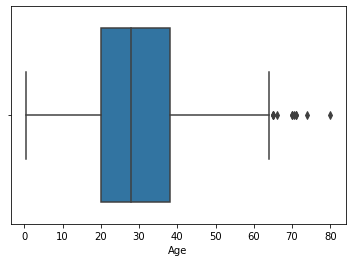

In [129]:
sns.boxplot('Age',data=df2)

In [130]:
#now replacing the NAN values with the extreme values 
def imp_nan_end(df,var,med,ext):
    df2[var] = df2[var].fillna(med,inplace = True)
    df2[var+'_ext'] = df2[var].fillna(ext)

In [131]:
med = df2['Age'].median()

In [132]:
imp_nan_end(df2,'Age',med,extreme)

In [133]:
df2

,Survived,Age,Fare,Age_ext
0,0,None,7.2500,73.27861
1,1,None,71.2833,73.27861
2,1,None,7.9250,73.27861
3,1,None,53.1000,73.27861
4,0,None,8.0500,73.27861
...,...,...,...,...
886,0,None,13.0000,73.27861
887,1,None,30.0000,73.27861
888,0,None,23.4500,73.27861
889,1,None,30.0000,73.27861


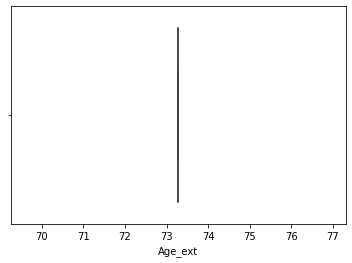

In [135]:
sns.boxplot('Age_ext',data = df2)

In [136]:
#this data is fucked up try again later